# Análisis de datos: Gasto Público Social , Presupuesto Nacional. 


Proyecto práctico para analizar dos conjuntos de datos, *dataset*, sobre Gastos Público Social y Presupuesto Nacional, del Uruguay.<br>
La fuente de cada dataset se encuentra en: 

1. " https://catalogodatos.gub.uy/dataset/mides-indicador-13198 "

2. " https://catalogodatos.gub.uy/dataset/opp-presupuestos-quinquenales "

La idea de este trabajo es realizar un análisis completo, en caso que sea necesario. Esto es, Carga del dataset, data wrangling, ETL, visualización de datos.

Parte de la visualización de datos, se hará en Tableau Public. 

---
Anthony de los Santos.


### Algunos comentarios: 
- Gran parte del trabajo será en visualización. Sobre Presupuesto Nacional se tratará en el período 2015-2018 y se presenta un dashboard en Tableau Public *(el link estará en la respectiva sección)* . 
- En esta hoja se presenta el código para ralizar gráficas y filtros en los dataset. 
- Se agradece a quien visite esta hoja, notebook, comentarios o críticas de este trabajo. Puede que se quieran agregar preguntas sobre los datos o un análisis más profundo en algún tema. Se agradece comentarios 

In [ ]:
#
# carga de paquetes para el trabajo
#

import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
plt.style.use("seaborn"); 

In [ ]:
# Carga de dataset

# Gasto Público Social;
gastos      = pd.read_csv("https://raw.githubusercontent.com/anthonydlsantos/ejemplos_python/master/gastosPresupuesto/gastos.csv");      

# Presupuesto 2015 - 2019;
presupuesto = pd.read_csv("https://raw.githubusercontent.com/anthonydlsantos/ejemplos_python/master/gastosPresupuesto/presupuesto20152019.csv");


In [ ]:
print("Dimensión de cada dataset gastosPublicos y presupuesto20152019 : ", gastos.shape, "|", presupuesto.shape)


Dimensión de cada dataset gastosPublicos y presupuesto20152019 :  (70, 4) | (4516, 14)


## El dataset Gastos. 

Gastos Publicos Sociales.

---

In [ ]:
# Para comenzar, se realiza un analisis en el dataset gastos. 
gastos.head() 

,Unnamed: 0,Funciones GPS_fg,año,valor
0,0,Educación,2005,13330423
1,1,Salud,2005,17109940
2,2,Seguridad y Asistencia Social,2005,48449411
3,3,Vivienda y Servicios comunitarios,2005,5537733
4,4,Cultura y Deporte,2005,803209


In [ ]:
#
# Sobre gastos, ¿ Cuanto fue el gasto correspondiente al año 2005 y 2006 ? 
#

In [ ]:
# Filtramos esos datos:  
gastos2005 = gastos.loc[ gastos["año"] == 2005 ]; 
gastos2006 = gastos.loc[ gastos["año"] == 2006 ];

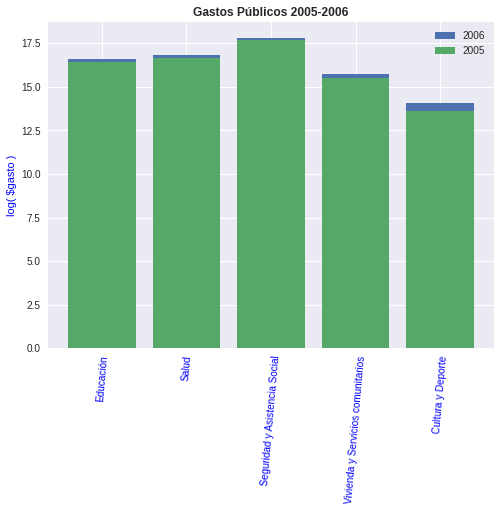

In [ ]:
#
# Creamos una gráfica de barras con esos datos de gastos en 2005,2006;
# _ Para una mejor visualización se aplica logaritmo al gasto ( log( data["valor"] ) )
#

plt.figure(figsize=[8,6])

plt.bar( gastos2006["Funciones GPS_fg"], gastos2006["valor"].transform( np.log ), label="2006" )
plt.bar( gastos2005["Funciones GPS_fg"], gastos2005["valor"].transform( np.log ), label="2005" )

plt.title("Gastos Públicos 2005-2006", fontweight="bold")
plt.ylabel(" log( $gasto ) ", color="blue")
plt.tick_params(axis="x", colors="blue", labelrotation = 85)
plt.legend()

plt.show()

En base al simple plot *(Gráfica)* se puede ver que se destina el mayor gasto público a Seguridad y Servicios comunitarios, siendo Cultura y Deporte el menor valor destinado al gasto público.  

In [ ]:
#
# Valores máximos y mínimos de gastos en 2005;
#

maxGasto2005 = gastos2005.loc[ gastos2005["valor"] == gastos2005["valor"].max() ]; # Con valor en miles de pesos $. 
maxGasto2005

,Unnamed: 0,Funciones GPS_fg,año,valor
2,2,Seguridad y Asistencia Social,2005,48449411


In [ ]:
minGasto2005 = gastos2005.loc[ gastos2005["valor"] == gastos2005["valor"].min() ];
minGasto2005

,Unnamed: 0,Funciones GPS_fg,año,valor
4,4,Cultura y Deporte,2005,803209


In [ ]:
# ¿ Como evolucionan los gastos en el tiempo ? 

In [ ]:
#
# Educacion, Salud, Seguridad y Asistencia social, vivienda y servicios comunitarios, cultura y deporte. 
# Evolucion temporal (en años)
#

In [ ]:
# Tomo como partida, la evolución de gastos en función del año de la educacion. 

ed = gastos.loc[ gastos["Funciones GPS_fg"] == "Educación" ];


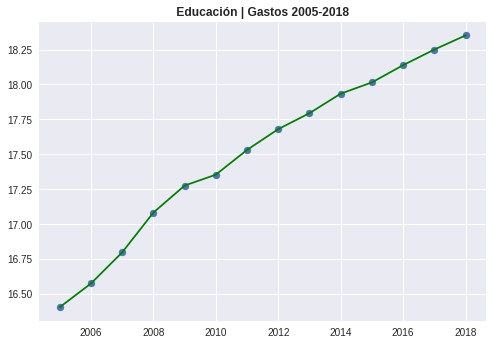

In [ ]:

plt.figure()
plt.scatter( ed[ "año" ], ed[ "valor" ].transform( np.log ) )
plt.plot( ed[ "año" ], ed[ "valor" ].transform( np.log ), "g" )


plt.title( " Educación | Gastos 2005-2018 ", fontweight="bold" )


plt.show()

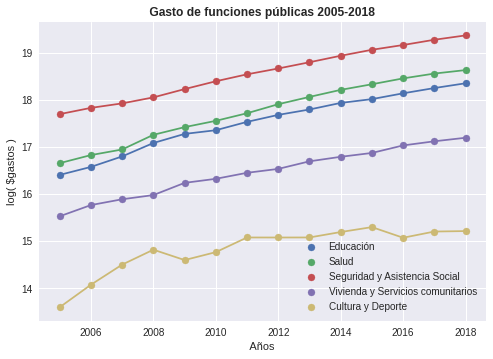

In [ ]:
#
# Todos
# 

funciones = list(gastos["Funciones GPS_fg"].drop_duplicates());

plt.figure();

for i in funciones:
    d = gastos.loc[ gastos["Funciones GPS_fg"] == i ];
    
    plt.scatter( d[ "año" ], d[ "valor" ].transform( np.log ), label=i)
    plt.plot( d[ "año" ], d[ "valor" ].transform( np.log ) )

    plt.title( " Gasto de funciones públicas 2005-2018 ", fontweight="bold" )
    plt.legend()


plt.xlabel(" Años ")
plt.ylabel(" log( $gastos ) ")
plt.show();
    


## El dataset Presupuesto.  

---

In [ ]:
# Una mirada "rapida" en presupuesto. 
presupuesto.head()

,año,organismo_sigla,ue_sigla,ue_nombre,ap_codigo,ap_nombre,ap_descripcion,programa_codigo,programa_nombre,programa_objetivo,organismo_codigo,ue_codigo,tipo_gasto_nombre,presupuestado
0,2015,ANEP,CEIP,Consejo de Educación Inicial y Primaria,8,EDUCACIÓN,Comprende los servicios prestados a alumnos y ...,2,Educacion Inicial y Primaria,El Consejo de Educación Inicial y Primaria tie...,25,2,FUNCIONAMIENTO,1600263803
1,2015,ANEP,CEIP,Consejo de Educación Inicial y Primaria,8,EDUCACIÓN,Comprende los servicios prestados a alumnos y ...,2,Educacion Inicial y Primaria,El Consejo de Educación Inicial y Primaria tie...,25,2,INVERSION,162327838
2,2015,ANEP,CEIP,Consejo de Educación Inicial y Primaria,8,EDUCACIÓN,Comprende los servicios prestados a alumnos y ...,2,Educacion Inicial y Primaria,El Consejo de Educación Inicial y Primaria tie...,25,2,PERSONAL,16151734589
3,2015,ANEP,CEIP,Consejo de Educación Inicial y Primaria,8,EDUCACIÓN,Comprende los servicios prestados a alumnos y ...,340,Acceso a la Educación,Objetivos del Programa: 1.Mejorar el acceso al...,25,2,FUNCIONAMIENTO,87612098
4,2015,ANEP,CEIP,Consejo de Educación Inicial y Primaria,8,EDUCACIÓN,Comprende los servicios prestados a alumnos y ...,340,Acceso a la Educación,Objetivos del Programa: 1.Mejorar el acceso al...,25,2,PERSONAL,684459350


In [ ]:
# 
# Presupuesto entre 2015-2018; 
# Y el enfoque será en ANEP (Administración Nacional de Educación Pública)
# M.Interior (Ministerio del interior), MIDES, UdelaR;
#

dataPresupuesto = presupuesto.loc[ presupuesto["año"] <= 2018 ]; # Presupuesto entre 2015-1018
organismos = list( dataPresupuesto["organismo_sigla"].drop_duplicates() ); # Lista de organismos según su sigla

org = [];
for i in organismos:
    if i in ["ANEP","M.Interior","MIDES","UdelaR"]:
        org.append(i)
        
org # Organismos a estudiar el presupuesto 2015-2018

['ANEP', 'M.Interior', 'MIDES', 'UdelaR']

In [ ]:
# dataset presupuesto 2015-2018 | ANEP, M.Interior, MIDES, UdelaR;
prespto1518 = pd.concat( [ dataPresupuesto.loc[ dataPresupuesto["organismo_sigla"] == i ] for i in org ] );
print("Dimensión del dataset prespto1518 :", prespto1518.shape)

Dimensión del dataset prespto1518 : (823, 14)


- Para ver el dashboard de Presupuesto Nacional 2015-2018: 

link: https://public.tableau.com/app/profile/anthony.gregory.de.los.santos.epifanio/viz/presupuesto20152018/Dashboard1

---

- Referencias: 
1. Sobre Gasto Público Social;  https://www.gub.uy/ministerio-economia-finanzas/node/1582
2. Sobre Ley de Presupuesto Nacional; https://www.gub.uy/ministerio-economia-finanzas/comunicacion/publicaciones/es-presupuesto-nacional
